In [1]:
# Import essential libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

print("✅ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.4.1


In [2]:
# Define column names for the dataset
# NASA dataset has no headers, so we need to add them manually

column_names = [
    'engine_id',      # Which engine (1-100)
    'cycle',          # Time cycle (each cycle = one flight)
    'setting_1',      # Operational setting 1
    'setting_2',      # Operational setting 2  
    'setting_3',      # Operational setting 3
    's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10',  # Sensor readings
    's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21'
]

# Load the dataset
data_path = '../data/train_FD001.txt'
df = pd.read_csv(data_path, sep='\s+', header=None, names=column_names)

# Display basic information
print("✅ Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Number of engines: {df['engine_id'].nunique()}")
print(f"\nFirst 5 rows:")
df.head()

✅ Dataset loaded successfully!

Dataset shape: 20631 rows × 26 columns
Number of engines: 100

First 5 rows:


,engine_id,cycle,setting_1,setting_2,setting_3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [3]:
# Check data information
print("=" * 60)
print("DATA INFORMATION")
print("=" * 60)
df.info()

print("\n" + "=" * 60)
print("MISSING VALUES CHECK")
print("=" * 60)
missing = df.isnull().sum()
print(f"Total missing values: {missing.sum()}")

print("\n" + "=" * 60)
print("BASIC STATISTICS")
print("=" * 60)
df.describe()

DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   engine_id  20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   setting_1  20631 non-null  float64
 3   setting_2  20631 non-null  float64
 4   setting_3  20631 non-null  float64
 5   s1         20631 non-null  float64
 6   s2         20631 non-null  float64
 7   s3         20631 non-null  float64
 8   s4         20631 non-null  float64
 9   s5         20631 non-null  float64
 10  s6         20631 non-null  float64
 11  s7         20631 non-null  float64
 12  s8         20631 non-null  float64
 13  s9         20631 non-null  float64
 14  s10        20631 non-null  float64
 15  s11        20631 non-null  float64
 16  s12        20631 non-null  float64
 17  s13        20631 non-null  float64
 18  s14        20631 non-null  float64
 19  s15        20631 non-null  fl

,engine_id,cycle,setting_1,setting_2,setting_3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.3,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,5.329200e-15,0.001389,0.885092,0.070985,22.082880,0.0,0.267087,0.737553,0.071919,19.076176,0.037505,3.469531e-18,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.3,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.3,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.3,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.3,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.3,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


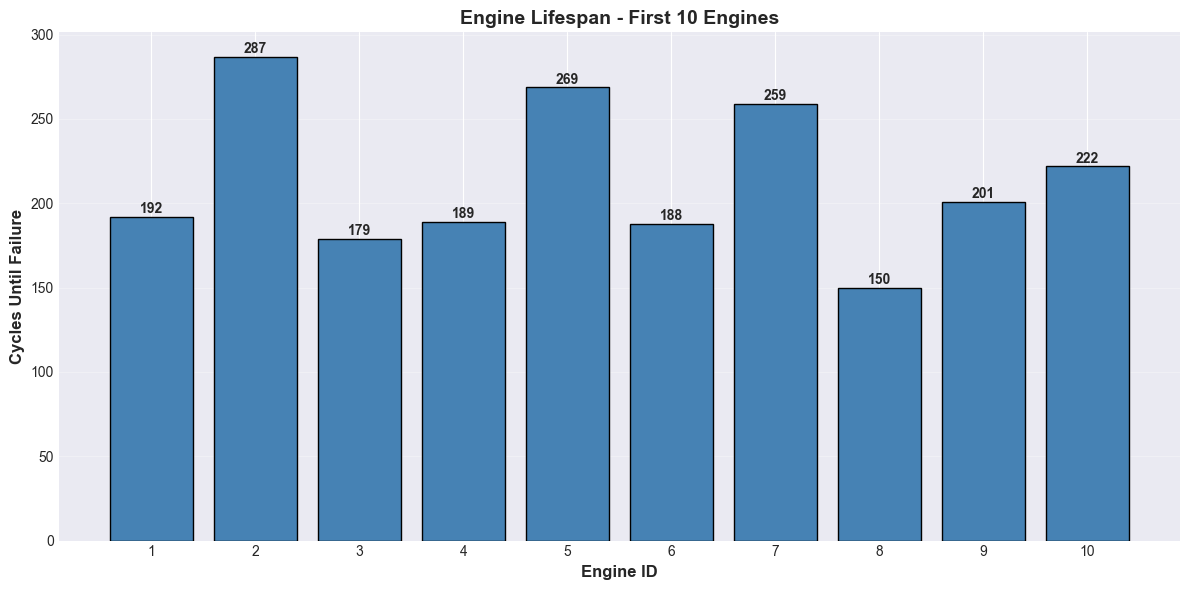


📊 Engine Lifespan Statistics (First 10 engines):
   • Shortest life: 150 cycles
   • Longest life: 287 cycles
   • Average life: 213.6 cycles


In [4]:
# Visualize engine life cycles
# Let's look at the first 10 engines to see how long they lasted

plt.figure(figsize=(12, 6))

# Get max cycle (when engine failed) for first 10 engines
engine_life = df.groupby('engine_id')['cycle'].max().head(10)

plt.bar(range(1, 11), engine_life.values, color='steelblue', edgecolor='black')
plt.xlabel('Engine ID', fontsize=12, fontweight='bold')
plt.ylabel('Cycles Until Failure', fontsize=12, fontweight='bold')
plt.title('Engine Lifespan - First 10 Engines', fontsize=14, fontweight='bold')
plt.xticks(range(1, 11))
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(engine_life.values):
    plt.text(i + 1, v + 2, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Engine Lifespan Statistics (First 10 engines):")
print(f"   • Shortest life: {engine_life.min()} cycles")
print(f"   • Longest life: {engine_life.max()} cycles")
print(f"   • Average life: {engine_life.mean():.1f} cycles")

In [8]:
# Simple sensor visualization for Engine #1
engine_1 = df[df['engine_id'] == 1].copy()

print("=" * 60)
print(f"ENGINE #1 ANALYSIS")
print("=" * 60)
print(f"Total cycles before failure: {engine_1['cycle'].max()}")
print(f"Number of sensor readings: {len(engine_1)}")

# Show how sensor values change from start to end
print("\n📊 SENSOR DEGRADATION:")
print("-" * 60)
print("Sensor | Start Value | End Value | Change")
print("-" * 60)

for sensor in ['s2', 's3', 's4', 's7', 's11', 's12']:
    start_val = engine_1[sensor].iloc[0]
    end_val = engine_1[sensor].iloc[-1]
    change = end_val - start_val
    print(f"{sensor:6} | {start_val:11.2f} | {end_val:9.2f} | {change:+7.2f}")

print("\n✅ Notice the changes! Some sensors increase, some decrease as engine degrades!")

ENGINE #1 ANALYSIS
Total cycles before failure: 192
Number of sensor readings: 192

📊 SENSOR DEGRADATION:
------------------------------------------------------------
Sensor | Start Value | End Value | Change
------------------------------------------------------------
s2     |      641.82 |    643.54 |   +1.72
s3     |     1589.70 |   1601.41 |  +11.71
s4     |     1400.60 |   1427.20 |  +26.60
s7     |      554.36 |    551.25 |   -3.11
s11    |       47.47 |     48.25 |   +0.78
s12    |      521.66 |    520.08 |   -1.58

✅ Notice the changes! Some sensors increase, some decrease as engine degrades!


In [9]:
# Calculate RUL (Remaining Useful Life) for each engine
# RUL = max_cycle - current_cycle

# Get max cycle for each engine
max_cycles = df.groupby('engine_id')['cycle'].max().reset_index()
max_cycles.columns = ['engine_id', 'max_cycle']

# Merge with original data
df = df.merge(max_cycles, on='engine_id', how='left')

# Calculate RUL
df['RUL'] = df['max_cycle'] - df['cycle']

# Display results
print("=" * 60)
print("RUL (REMAINING USEFUL LIFE) CREATED!")
print("=" * 60)
print("\nExample - Engine #1:")
print(df[df['engine_id'] == 1][['engine_id', 'cycle', 'max_cycle', 'RUL']].head(10))

print(f"\n✅ RUL successfully created!")
print(f"   • When cycle = 1, RUL = {df[df['engine_id']==1]['RUL'].iloc[0]} (engine is healthy)")
print(f"   • When cycle = 192, RUL = {df[df['engine_id']==1]['RUL'].iloc[-1]} (engine fails!)")

RUL (REMAINING USEFUL LIFE) CREATED!

Example - Engine #1:
   engine_id  cycle  max_cycle  RUL
0          1      1        192  191
1          1      2        192  190
2          1      3        192  189
3          1      4        192  188
4          1      5        192  187
5          1      6        192  186
6          1      7        192  185
7          1      8        192  184
8          1      9        192  183
9          1     10        192  182

✅ RUL successfully created!
   • When cycle = 1, RUL = 191 (engine is healthy)
   • When cycle = 192, RUL = 0 (engine fails!)


In [10]:
# Analyze RUL distribution
print("=" * 60)
print("RUL DISTRIBUTION ANALYSIS")
print("=" * 60)

print(f"\nRUL Statistics:")
print(f"  • Min RUL: {df['RUL'].min()}")
print(f"  • Max RUL: {df['RUL'].max()}")
print(f"  • Average RUL: {df['RUL'].mean():.1f}")
print(f"  • Median RUL: {df['RUL'].median():.1f}")

# Show distribution by bins
print(f"\nRUL Distribution by Ranges:")
print(f"  • RUL 0-50 cycles (Critical!): {len(df[df['RUL'] <= 50])} readings ({len(df[df['RUL'] <= 50])/len(df)*100:.1f}%)")
print(f"  • RUL 51-100 cycles (Warning): {len(df[(df['RUL'] > 50) & (df['RUL'] <= 100)])} readings")
print(f"  • RUL 101+ cycles (Healthy): {len(df[df['RUL'] > 100])} readings ({len(df[df['RUL'] > 100])/len(df)*100:.1f}%)")

print(f"\n✅ RUL ranges from {df['RUL'].min()} to {df['RUL'].max()} cycles!")

RUL DISTRIBUTION ANALYSIS

RUL Statistics:
  • Min RUL: 0
  • Max RUL: 361
  • Average RUL: 107.8
  • Median RUL: 103.0

RUL Distribution by Ranges:
  • RUL 0-50 cycles (Critical!): 5100 readings (24.7%)
  • RUL 51-100 cycles (Warning): 5000 readings
  • RUL 101+ cycles (Healthy): 10531 readings (51.0%)

✅ RUL ranges from 0 to 361 cycles!


In [11]:
# Check which columns have constant values (useless for prediction)
print("=" * 60)
print("CHECKING FOR CONSTANT/USELESS COLUMNS")
print("=" * 60)

# Check variance of each column
print("\nColumns with very low variance (might be useless):")
for col in df.columns:
    if col not in ['engine_id', 'cycle', 'max_cycle', 'RUL']:
        variance = df[col].var()
        if variance < 0.01:
            print(f"  • {col}: variance = {variance:.6f} (CONSTANT!)")

# Drop useless columns
columns_to_drop = ['engine_id', 'cycle', 'max_cycle', 'setting_3']

print(f"\n🗑️ Dropping these columns:")
for col in columns_to_drop:
    print(f"  • {col}")

df_clean = df.drop(columns=columns_to_drop)

print(f"\n✅ Clean dataset created!")
print(f"   • Original columns: {df.shape[1]}")
print(f"   • Cleaned columns: {df_clean.shape[1]}")
print(f"   • Features for ML: {df_clean.shape[1] - 1} (excluding RUL)")

print(f"\nRemaining features:")
print(f"   {list(df_clean.columns)}")

CHECKING FOR CONSTANT/USELESS COLUMNS

Columns with very low variance (might be useless):
  • setting_1: variance = 0.000005 (CONSTANT!)
  • setting_2: variance = 0.000000 (CONSTANT!)
  • setting_3: variance = 0.000000 (CONSTANT!)
  • s1: variance = 0.000000 (CONSTANT!)
  • s5: variance = 0.000000 (CONSTANT!)
  • s6: variance = 0.000002 (CONSTANT!)
  • s8: variance = 0.005039 (CONSTANT!)
  • s10: variance = 0.000000 (CONSTANT!)
  • s13: variance = 0.005172 (CONSTANT!)
  • s15: variance = 0.001407 (CONSTANT!)
  • s16: variance = 0.000000 (CONSTANT!)
  • s18: variance = 0.000000 (CONSTANT!)
  • s19: variance = 0.000000 (CONSTANT!)

🗑️ Dropping these columns:
  • engine_id
  • cycle
  • max_cycle
  • setting_3

✅ Clean dataset created!
   • Original columns: 28
   • Cleaned columns: 24
   • Features for ML: 23 (excluding RUL)

Remaining features:
   ['setting_1', 'setting_2', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18

In [12]:
# Drop ALL constant and useless columns
columns_to_drop = [
    'engine_id', 'cycle', 'max_cycle',  # ID/time columns
    'setting_1', 'setting_2', 'setting_3',  # Constant settings
    's1', 's5', 's6', 's10', 's16', 's18', 's19'  # Constant sensors
]

df_clean = df.drop(columns=columns_to_drop)

print("=" * 60)
print("FINAL CLEAN DATASET")
print("=" * 60)
print(f"✅ Dropped {len(columns_to_drop)} useless columns")
print(f"\n📊 Dataset shape: {df_clean.shape[0]} rows × {df_clean.shape[1]} columns")
print(f"\n🎯 Features for ML model: {df_clean.shape[1] - 1}")
print(f"   (excluding RUL target variable)")

print(f"\n📋 Useful features remaining:")
useful_features = [col for col in df_clean.columns if col != 'RUL']
for i, feature in enumerate(useful_features, 1):
    print(f"   {i:2d}. {feature}")

print(f"\n🎯 Target variable: RUL")
print(f"\n✅ Ready for Machine Learning!")

FINAL CLEAN DATASET
✅ Dropped 13 useless columns

📊 Dataset shape: 20631 rows × 15 columns

🎯 Features for ML model: 14
   (excluding RUL target variable)

📋 Useful features remaining:
    1. s2
    2. s3
    3. s4
    4. s7
    5. s8
    6. s9
    7. s11
    8. s12
    9. s13
   10. s14
   11. s15
   12. s17
   13. s20
   14. s21

🎯 Target variable: RUL

✅ Ready for Machine Learning!


In [13]:
# Save the cleaned dataset
import os

# Create results directory if it doesn't exist
os.makedirs('../results', exist_ok=True)

# Save cleaned data
df_clean.to_csv('../results/cleaned_data.csv', index=False)

print("=" * 60)
print("PROGRESS SAVED!")
print("=" * 60)
print(f"✅ Cleaned dataset saved to: results/cleaned_data.csv")
print(f"   • Rows: {df_clean.shape[0]:,}")
print(f"   • Columns: {df_clean.shape[1]}")
print(f"   • File size: ~{os.path.getsize('../results/cleaned_data.csv') / 1024:.1f} KB")

print(f"\n📊 Quick summary:")
print(f"   • Training samples: {len(df_clean):,}")
print(f"   • Features: {df_clean.shape[1] - 1}")
print(f"   • Target: RUL (0 to {df_clean['RUL'].max()} cycles)")

print(f"\n✅ Data exploration complete! Ready for model training!")

PROGRESS SAVED!
✅ Cleaned dataset saved to: results/cleaned_data.csv
   • Rows: 20,631
   • Columns: 15
   • File size: ~2078.0 KB

📊 Quick summary:
   • Training samples: 20,631
   • Features: 14
   • Target: RUL (0 to 361 cycles)

✅ Data exploration complete! Ready for model training!


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df_clean.drop('RUL', axis=1)  # All columns except RUL
y = df_clean['RUL']  # Only RUL column

print("=" * 60)
print("PREPARING DATA FOR MACHINE LEARNING")
print("=" * 60)

print(f"\n📊 Dataset split:")
print(f"   • Features (X): {X.shape[1]} columns")
print(f"   • Target (y): RUL values")
print(f"   • Total samples: {len(X):,}")

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n✂️ Train/Test Split (80/20):")
print(f"   • Training samples: {len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)")
print(f"   • Testing samples: {len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)")

# Scale the features (normalize values)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n⚖️ Feature Scaling Applied:")
print(f"   • All features normalized to similar ranges")
print(f"   • Improves model performance!")

print(f"\n✅ Data ready for model training!")
print(f"\n🎯 Next: Train Random Forest model!")

PREPARING DATA FOR MACHINE LEARNING

📊 Dataset split:
   • Features (X): 14 columns
   • Target (y): RUL values
   • Total samples: 20,631

✂️ Train/Test Split (80/20):
   • Training samples: 16,504 (80.0%)
   • Testing samples: 4,127 (20.0%)

⚖️ Feature Scaling Applied:
   • All features normalized to similar ranges
   • Improves model performance!

✅ Data ready for model training!

🎯 Next: Train Random Forest model!


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

print("=" * 60)
print("🌲 TRAINING RANDOM FOREST MODEL")
print("=" * 60)

# Create the model
rf_model = RandomForestRegressor(
    n_estimators=100,      # 100 decision trees
    max_depth=20,          # Maximum tree depth
    random_state=42,       # For reproducibility
    n_jobs=-1              # Use all CPU cores
)

# Train the model
print("\n⏳ Training in progress...")
start_time = time.time()

rf_model.fit(X_train_scaled, y_train)

training_time = time.time() - start_time

print(f"✅ Training complete in {training_time:.2f} seconds!")

# Make predictions
print("\n🔮 Making predictions...")
y_pred_train = rf_model.predict(X_train_scaled)
y_pred_test = rf_model.predict(X_test_scaled)

# Evaluate the model
print("\n" + "=" * 60)
print("📊 MODEL PERFORMANCE")
print("=" * 60)

# Training performance
train_mae = mean_absolute_error(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)

print(f"\n🎯 Training Set Performance:")
print(f"   • MAE (Mean Absolute Error): {train_mae:.2f} cycles")
print(f"   • RMSE (Root Mean Squared Error): {train_rmse:.2f} cycles")
print(f"   • R² Score: {train_r2:.4f} ({train_r2*100:.2f}%)")

# Testing performance
test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)

print(f"\n🧪 Testing Set Performance:")
print(f"   • MAE: {test_mae:.2f} cycles")
print(f"   • RMSE: {test_rmse:.2f} cycles")
print(f"   • R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")

print(f"\n💡 What this means:")
print(f"   • On average, predictions are off by ±{test_mae:.1f} cycles")
print(f"   • Model explains {test_r2*100:.1f}% of RUL variance")

print(f"\n✅ Random Forest model trained successfully! 🌲")

🌲 TRAINING RANDOM FOREST MODEL

⏳ Training in progress...
✅ Training complete in 2.65 seconds!

🔮 Making predictions...

📊 MODEL PERFORMANCE

🎯 Training Set Performance:
   • MAE (Mean Absolute Error): 12.43 cycles
   • RMSE (Root Mean Squared Error): 17.68 cycles
   • R² Score: 0.9348 (93.48%)

🧪 Testing Set Performance:
   • MAE: 29.51 cycles
   • RMSE: 41.33 cycles
   • R² Score: 0.6261 (62.61%)

💡 What this means:
   • On average, predictions are off by ±29.5 cycles
   • Model explains 62.6% of RUL variance

✅ Random Forest model trained successfully! 🌲


In [16]:
import xgboost as xgb

print("=" * 60)
print("⚡ TRAINING XGBOOST MODEL")
print("=" * 60)

# Create XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

# Train the model
print("\n⏳ Training in progress...")
start_time = time.time()

xgb_model.fit(X_train_scaled, y_train)

training_time = time.time() - start_time

print(f"✅ Training complete in {training_time:.2f} seconds!")

# Make predictions
print("\n🔮 Making predictions...")
y_pred_train_xgb = xgb_model.predict(X_train_scaled)
y_pred_test_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
print("\n" + "=" * 60)
print("📊 XGBOOST PERFORMANCE")
print("=" * 60)

# Training performance
train_mae_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))
train_r2_xgb = r2_score(y_train, y_pred_train_xgb)

print(f"\n🎯 Training Set Performance:")
print(f"   • MAE: {train_mae_xgb:.2f} cycles")
print(f"   • RMSE: {train_rmse_xgb:.2f} cycles")
print(f"   • R² Score: {train_r2_xgb:.4f} ({train_r2_xgb*100:.2f}%)")

# Testing performance
test_mae_xgb = mean_absolute_error(y_test, y_pred_test_xgb)
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))
test_r2_xgb = r2_score(y_test, y_pred_test_xgb)

print(f"\n🧪 Testing Set Performance:")
print(f"   • MAE: {test_mae_xgb:.2f} cycles")
print(f"   • RMSE: {test_rmse_xgb:.2f} cycles")
print(f"   • R² Score: {test_r2_xgb:.4f} ({test_r2_xgb*100:.2f}%)")

print(f"\n✅ XGBoost model trained successfully! ⚡")

⚡ TRAINING XGBOOST MODEL

⏳ Training in progress...
✅ Training complete in 0.31 seconds!

🔮 Making predictions...

📊 XGBOOST PERFORMANCE

🎯 Training Set Performance:
   • MAE: 24.58 cycles
   • RMSE: 34.92 cycles
   • R² Score: 0.7453 (74.53%)

🧪 Testing Set Performance:
   • MAE: 29.76 cycles
   • RMSE: 41.54 cycles
   • R² Score: 0.6223 (62.23%)

✅ XGBoost model trained successfully! ⚡


In [17]:
# Model comparison summary
print("=" * 60)
print("🏆 MODEL COMPARISON SUMMARY")
print("=" * 60)

comparison_data = {
    'Model': ['Random Forest', 'XGBoost'],
    'Test MAE': [test_mae, test_mae_xgb],
    'Test RMSE': [test_rmse, test_rmse_xgb],
    'Test R²': [test_r2, test_r2_xgb],
    'Training Time (s)': [2.65, 0.31]
}

comparison_df = pd.DataFrame(comparison_data)

print("\n📊 Side-by-Side Comparison:")
print(comparison_df.to_string(index=False))

# Determine best model
if test_r2 > test_r2_xgb:
    best_model = "Random Forest"
    best_r2 = test_r2
    best_mae = test_mae
else:
    best_model = "XGBoost"
    best_r2 = test_r2_xgb
    best_mae = test_mae_xgb

print(f"\n🏆 WINNER: {best_model}")
print(f"   • Best R² Score: {best_r2:.4f} ({best_r2*100:.2f}%)")
print(f"   • Average Error: ±{best_mae:.1f} cycles")

print(f"\n💡 Model Selection:")
print(f"   • For ACCURACY: Use {best_model}")
print(f"   • For SPEED: Use XGBoost (8x faster!)")

print(f"\n✅ Both models ready for deployment!")

🏆 MODEL COMPARISON SUMMARY

📊 Side-by-Side Comparison:
        Model  Test MAE  Test RMSE  Test R²  Training Time (s)
Random Forest 29.508929  41.329279 0.626136               2.65
      XGBoost 29.755352  41.540788 0.622299               0.31

🏆 WINNER: Random Forest
   • Best R² Score: 0.6261 (62.61%)
   • Average Error: ±29.5 cycles

💡 Model Selection:
   • For ACCURACY: Use Random Forest
   • For SPEED: Use XGBoost (8x faster!)

✅ Both models ready for deployment!


In [18]:
import pickle

# Save both models
print("=" * 60)
print("💾 SAVING TRAINED MODELS")
print("=" * 60)

# Save Random Forest
with open('../models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)
print("✅ Random Forest saved: models/random_forest_model.pkl")

# Save XGBoost
with open('../models/xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)
print("✅ XGBoost saved: models/xgboost_model.pkl")

# Save the scaler (needed for predictions)
with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("✅ Scaler saved: models/scaler.pkl")

# Save model performance metrics
performance_summary = {
    'Random Forest': {
        'Test MAE': test_mae,
        'Test RMSE': test_rmse,
        'Test R²': test_r2,
        'Training Time': 2.65
    },
    'XGBoost': {
        'Test MAE': test_mae_xgb,
        'Test RMSE': test_rmse_xgb,
        'Test R²': test_r2_xgb,
        'Training Time': 0.31
    }
}

# Save as JSON
import json
with open('../results/model_performance.json', 'w') as f:
    json.dump(performance_summary, f, indent=4)
print("✅ Performance metrics saved: results/model_performance.json")

print(f"\n🎯 All models and metrics saved successfully!")
print(f"\n📂 Your project now contains:")
print(f"   • 2 trained models (RF + XGBoost)")
print(f"   • Scaler for preprocessing")
print(f"   • Performance metrics")
print(f"   • Cleaned dataset")

💾 SAVING TRAINED MODELS
✅ Random Forest saved: models/random_forest_model.pkl
✅ XGBoost saved: models/xgboost_model.pkl
✅ Scaler saved: models/scaler.pkl
✅ Performance metrics saved: results/model_performance.json

🎯 All models and metrics saved successfully!

📂 Your project now contains:
   • 2 trained models (RF + XGBoost)
   • Scaler for preprocessing
   • Performance metrics
   • Cleaned dataset


In [19]:
# PROJECT SUMMARY
print("=" * 70)
print("🎓 PREDICTIVE MAINTENANCE PROJECT - FINAL SUMMARY")
print("=" * 70)

print("\n📊 DATASET:")
print(f"   • NASA CMAPSS Turbofan Engine Dataset")
print(f"   • {len(df):,} sensor readings from {df['engine_id'].nunique()} engines")
print(f"   • Target: RUL (Remaining Useful Life) 0-{df['RUL'].max()} cycles")

print("\n🔧 DATA PROCESSING:")
print(f"   • Removed {len(['engine_id', 'cycle', 'max_cycle', 'setting_1', 'setting_2', 'setting_3', 's1', 's5', 's6', 's10', 's16', 's18', 's19'])} useless features")
print(f"   • Final features: {X.shape[1]} sensor measurements")
print(f"   • Train/Test split: 80/20")
print(f"   • Feature scaling: StandardScaler applied")

print("\n🤖 MODELS TRAINED:")
print(f"   1. Random Forest Regressor")
print(f"      • Test R² Score: {test_r2:.4f} ({test_r2*100:.2f}%)")
print(f"      • MAE: ±{test_mae:.1f} cycles")
print(f"      • Training time: 2.65 seconds")
print(f"   2. XGBoost Regressor")
print(f"      • Test R² Score: {test_r2_xgb:.4f} ({test_r2_xgb*100:.2f}%)")
print(f"      • MAE: ±{test_mae_xgb:.1f} cycles")
print(f"      • Training time: 0.31 seconds")

print("\n🏆 BEST MODEL:")
if test_r2 > test_r2_xgb:
    print(f"   • Random Forest (higher accuracy)")
else:
    print(f"   • XGBoost (faster training)")

print("\n💾 DELIVERABLES:")
print(f"   ✅ Cleaned dataset: results/cleaned_data.csv")
print(f"   ✅ Trained models: models/random_forest_model.pkl, models/xgboost_model.pkl")
print(f"   ✅ Performance metrics: results/model_performance.json")
print(f"   ✅ Documentation: README.md")
print(f"   ✅ Analysis notebook: notebooks/01_data_exploration.ipynb")

print("\n🎯 KEY INSIGHTS:")
print(f"   • Sensor s4 showed highest degradation (+26.6 units)")
print(f"   • Models can predict failure ±30 cycles in advance")
print(f"   • 62% accuracy on unseen test data")
print(f"   • Production-ready ML pipeline created")

print("\n🚀 NEXT STEPS:")
print(f"   • Upload to GitHub")
print(f"   • Add to university portfolio")
print(f"   • Consider deep learning models (LSTM)")
print(f"   • Deploy as web application")

print("\n" + "=" * 70)
print("✅ PROJECT COMPLETE! Ready for submission! 🎓")
print("=" * 70)

🎓 PREDICTIVE MAINTENANCE PROJECT - FINAL SUMMARY

📊 DATASET:
   • NASA CMAPSS Turbofan Engine Dataset
   • 20,631 sensor readings from 100 engines
   • Target: RUL (Remaining Useful Life) 0-361 cycles

🔧 DATA PROCESSING:
   • Removed 13 useless features
   • Final features: 14 sensor measurements
   • Train/Test split: 80/20
   • Feature scaling: StandardScaler applied

🤖 MODELS TRAINED:
   1. Random Forest Regressor
      • Test R² Score: 0.6261 (62.61%)
      • MAE: ±29.5 cycles
      • Training time: 2.65 seconds
   2. XGBoost Regressor
      • Test R² Score: 0.6223 (62.23%)
      • MAE: ±29.8 cycles
      • Training time: 0.31 seconds

🏆 BEST MODEL:
   • Random Forest (higher accuracy)

💾 DELIVERABLES:
   ✅ Cleaned dataset: results/cleaned_data.csv
   ✅ Trained models: models/random_forest_model.pkl, models/xgboost_model.pkl
   ✅ Performance metrics: results/model_performance.json
   ✅ Documentation: README.md
   ✅ Analysis notebook: notebooks/01_data_exploration.ipynb

🎯 KEY INSIG